# CSC413 Final Project: Classification



In this assignment, we will
classify 


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models
import torchvision.datasets

%matplotlib inline


In [2]:
creatures_data_path = './resized_images/Flicker8k_Dataset'
items_data_path = './resized_images/images'
images_data_path = './resized_images'

In [3]:
#creatures_data = torchvision.datasets.ImageFolder(creatures_data_path, transform=torchvision.transforms.ToTensor())
#items_data = torchvision.datasets.ImageFolder(items_data_path, transform=torchvision.transforms.ToTensor())

images_data = torchvision.datasets.ImageFolder(images_data_path, transform=torchvision.transforms.ToTensor())
len(images_data)
for x, y in images_data:
    print(x.shape)
    print(x)
    break


torch.Size([3, 224, 224])
tensor([[[0.3843, 0.4314, 0.4784,  ..., 0.0235, 0.0353, 0.0314],
         [0.3608, 0.4667, 0.4902,  ..., 0.0235, 0.0471, 0.0392],
         [0.3333, 0.5098, 0.4941,  ..., 0.0392, 0.0588, 0.0588],
         ...,
         [0.6627, 0.6588, 0.7490,  ..., 0.6627, 0.6588, 0.6588],
         [0.6902, 0.8863, 0.9176,  ..., 0.6627, 0.6667, 0.6706],
         [0.7569, 0.7098, 0.7333,  ..., 0.6588, 0.6627, 0.6824]],

        [[0.3882, 0.4314, 0.4745,  ..., 0.0353, 0.0471, 0.0431],
         [0.3647, 0.4706, 0.4863,  ..., 0.0431, 0.0588, 0.0588],
         [0.3412, 0.5137, 0.4863,  ..., 0.0667, 0.0784, 0.0863],
         ...,
         [0.4000, 0.4078, 0.4941,  ..., 0.7373, 0.7216, 0.7216],
         [0.4392, 0.6431, 0.6824,  ..., 0.7294, 0.7216, 0.7255],
         [0.5137, 0.4784, 0.4980,  ..., 0.7216, 0.7176, 0.7294]],

        [[0.3686, 0.3922, 0.4039,  ..., 0.0078, 0.0196, 0.0157],
         [0.3451, 0.4392, 0.4157,  ..., 0.0157, 0.0314, 0.0314],
         [0.3294, 0.4824, 0.4275

In [4]:
for x, y in images_data:
    print(x.shape)
    print(y)
    break


torch.Size([3, 224, 224])
0


In [5]:

from sklearn.model_selection import train_test_split
from torch.utils.data import SubsetRandomSampler

In [6]:
#train_data = images_data[0:2]
#valid_data = images_loader[0.6*len(images_loader):0.8*len(images_loader)]
#test_data = images_loader[0.8*len(images_loader):]

sample_num = len(images_data)
file_idx = list(range(sample_num))
test_percentage = 0.1
train_val_idx, test_idx = train_test_split(
    file_idx, test_size=test_percentage, random_state=42)
train_valid_sampler = SubsetRandomSampler(train_val_idx)
test_sampler = SubsetRandomSampler(test_idx)


sub_sample_num = len(train_valid_sampler)
file_idx = list(range(sub_sample_num))
valid_percentage = 0.33
train_idx, valid_idx = train_test_split(
    file_idx, test_size=valid_percentage, random_state=42)
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


In [7]:
train_idx

[4952,
 12573,
 1477,
 4252,
 180,
 6399,
 7383,
 11149,
 12619,
 12591,
 255,
 14698,
 14102,
 6224,
 8618,
 11620,
 4513,
 7886,
 2631,
 107,
 3717,
 4463,
 13878,
 416,
 9757,
 12439,
 8280,
 6375,
 14361,
 2265,
 17226,
 5079,
 13199,
 7346,
 4606,
 13325,
 12589,
 16781,
 12402,
 16906,
 2621,
 2030,
 15544,
 39,
 5903,
 17110,
 6243,
 3508,
 13867,
 5981,
 12273,
 2980,
 3437,
 8262,
 7441,
 14027,
 17059,
 3544,
 8144,
 2867,
 4442,
 9975,
 10944,
 12480,
 13488,
 9749,
 6392,
 1878,
 5371,
 7800,
 8917,
 9173,
 15445,
 9354,
 16315,
 15246,
 2729,
 14573,
 13198,
 11750,
 8180,
 17587,
 15356,
 3076,
 5678,
 17524,
 12974,
 14610,
 12227,
 5297,
 2727,
 14694,
 3836,
 36,
 9451,
 4187,
 675,
 3633,
 1555,
 3529,
 3979,
 16456,
 15599,
 3708,
 8629,
 17045,
 11097,
 5775,
 15376,
 5384,
 15171,
 3820,
 13486,
 17422,
 15367,
 14396,
 1746,
 6886,
 17404,
 12381,
 8327,
 1052,
 4038,
 5834,
 3405,
 3705,
 17234,
 3955,
 5352,
 3375,
 3428,
 10325,
 2507,
 7553,
 4681,
 15589,
 21

In [8]:
# images_loader = torch.utils.data.DataLoader(images_data, batch_size=10, shuffle=True)
# train_loader = torch.utils.data.DataLoader(images_data, sampler=train_sampler, batch_size=10)
train_loader = torch.utils.data.DataLoader(images_data)
# train_loader = torch.utils.data.DataLoader(train_idx, sampler=train_sampler, batch_size=10, shuffle=True)
valid_loader = torch.utils.data.DataLoader(images_data, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(images_data, sampler=test_sampler)

print(len(train_loader))
len(valid_loader)
len(test_loader)

19667


1967

In [40]:
for x, y in train_loader:
    print(x.shape)
    print(y)
    break
    

torch.Size([1, 3, 224, 224])
tensor([0])


In [10]:
# for x, y in images_loader:
#     print(x.shape)
#     print(y)
#     break
print(len(train_sampler))
print(len(valid_sampler))
print(len(test_sampler))
print(len(train_sampler)+len(valid_sampler)+len(test_sampler))

11859
5841
1967
19667


In [11]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

In [14]:
train_data_feature = []
for img, y in train_loader:
    # print(img.shape, end=" ")
    features = alexnet.features(img).detach()
    # print(features.shape)
    train_data_feature.append((features, y))


In [15]:
valid_data_feature = []
for img, y in valid_loader:
    features = alexnet.features(img).detach()
    valid_data_feature.append((features, y))


In [16]:
test_data_feature = []
for img, y in test_loader:
    features = alexnet.features(img).detach()
    test_data_feature.append((features, y))


In [30]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1 * 256 * 6 * 6, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        x = self.fc1(x)
        return self.fc2(x)

In [62]:
def train(model, train_data, val_data, batch_size=256, weight_decay=0.0,
          optimizer="sgd", learning_rate=0.1, momentum=0.3,
          data_shuffle=True, num_epochs=3, checkpoint_path=None):
    # loss function
    
    criterion = nn.CrossEntropyLoss()
    # optimizer
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = optim.SGD(model.parameters(),
                              lr=learning_rate,
                              momentum=momentum,
                              weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
    # track learning curve
    iters, losses, train_accs, val_accs = [], [], [], []
    # training
    n = 0  # the number of iterations (for plotting)
    for epoch in range(num_epochs):
        # training data
        train_loader = torch.utils.data.DataLoader(train_data,
                                                   batch_size=batch_size,
                                                   shuffle=data_shuffle)
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue

            model.train()  # annotate model for training
            out = model(imgs)
            labels = labels.squeeze(1)
            # print(out.shape, labels.shape)
            loss = criterion(out, labels)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # save the current training information
            iters.append(n)
            # compute *average* loss
            single_loss = float(loss)/batch_size
            losses.append(single_loss)
            train_acc = get_accuracy(model, train_data)
            val_acc = get_accuracy(model, val_data)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            n += 1

            if checkpoint_path is not None:
                torch.save(model.state_dict(), checkpoint_path.format(n))

            print("Iter %d. [Loss %.9f] [Val Acc %.0f%%] [Train Acc %.0f%%]" %
                  (n, single_loss, val_acc * 100, train_acc * 100))
    return iters, losses, train_accs, val_accs


In [31]:
def get_accuracy(model, data):
    # print(data)
    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval()
    # print(len(loader))
    correct, total = 0, 0 
    for imgs, labels in loader:
        output = model(imgs)
        # print(f"{imgs.shape=} {labels.shape=}")
        
        
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total
    

In [20]:
# Your code goes here.
# ploting curve
def plot_learning_curve(iters, losses, train_accs, val_accs):
    """
    Plot the learning curve.
    """
    plt.title("Learning Curve: Loss per Iteration")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Learning Curve: Accuracy per Iteration")
    plt.plot(iters, train_accs, label="Train")
    plt.plot(iters, val_accs, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()


In [22]:
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
print(input.shape)
print(target.shape)

torch.Size([3, 5])
torch.Size([3, 5])


Iter 1. [Loss 0.002761782] [Val Acc 56%] [Train Acc 60%]
Iter 2. [Loss 0.011605722] [Val Acc 90%] [Train Acc 89%]
Iter 3. [Loss 0.001164263] [Val Acc 66%] [Train Acc 63%]
Iter 4. [Loss 0.008398877] [Val Acc 86%] [Train Acc 84%]
Iter 5. [Loss 0.002278927] [Val Acc 92%] [Train Acc 92%]
Iter 6. [Loss 0.001910874] [Val Acc 85%] [Train Acc 86%]
Iter 7. [Loss 0.002680059] [Val Acc 83%] [Train Acc 84%]
Iter 8. [Loss 0.003247086] [Val Acc 88%] [Train Acc 88%]
Iter 9. [Loss 0.002459646] [Val Acc 93%] [Train Acc 92%]
Iter 10. [Loss 0.001549795] [Val Acc 92%] [Train Acc 92%]
Iter 11. [Loss 0.001448746] [Val Acc 90%] [Train Acc 90%]
Iter 12. [Loss 0.001309766] [Val Acc 89%] [Train Acc 88%]
Iter 13. [Loss 0.003067580] [Val Acc 90%] [Train Acc 90%]
Iter 14. [Loss 0.001984282] [Val Acc 93%] [Train Acc 92%]
Iter 15. [Loss 0.000929261] [Val Acc 93%] [Train Acc 93%]
Iter 16. [Loss 0.000840347] [Val Acc 93%] [Train Acc 93%]
Iter 17. [Loss 0.001539709] [Val Acc 91%] [Train Acc 92%]
Iter 18. [Loss 0.001130

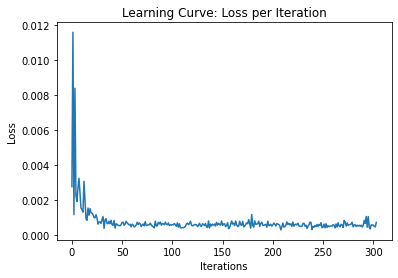

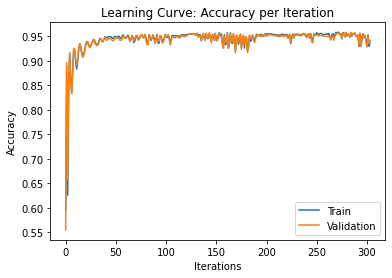

In [63]:
train_data_new = train_data_feature
valid_data_new = valid_data_feature
test_data_new = test_data_feature

mlp = MLP()
learning_curve_info = train(mlp,
                            train_data_new,
                            valid_data_new,
                            weight_decay=0.1,
                            optimizer="adam",
                            learning_rate=0.001,
                            num_epochs=4,
                            checkpoint_path='./mlp/ckpt-{}.pk')
plot_learning_curve(*learning_curve_info)